# 1).Problem Statement

- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.
- The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
- Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
- The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# 2).Hypothesis Generation

Store Level hypothesis :
- Population : cities with higher population have higher sales and stores will also make offers.
- Store capactiy : stores with high capacity should have offers and sale on a lot of pruducts.
- Location : stores in popular areas should have higher sales.
- Marketing : stores with a good maketing campaign have higher sales. 
- City type : if the city in tier 1 will have higher sales.

Product level hypothesis :
- Brand : popular, reliable and best quality brands will be most selling.
- Packaging : products with the best packaging will make a lot of sales.
- Advertising and marketing : the products with the best marketing will be the highest selling.

# 3).Loading Packages and Data





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=True)
print(f"The shape of the train set is {train.shape}")
print(f"The shape of the test set is {test.shape}")
print(f"The shape of the data set is {data.shape}")

The shape of the train set is (8523, 13)
The shape of the test set is (5681, 12)
The shape of the data set is (14204, 13)


# 4).Data Structure and Content


In [3]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [4]:
data.shape

(14204, 13)

In [5]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [7]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

notice we have null in 
- Item_Outlet_Sales 
- Item_Weight
- Outlet_Size

In [8]:
data.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

# 5).Exploratory Data Analysis


In [9]:
# Frequency of categorical data
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns
categorical_columns = [x for x in categorical_columns if x not in ["Item_Identifier","Outlet_Identifier","source"] ]
categorical_columns

# The first for loop is to get the all categorical vars from the data while the second one is to eliminate unecessary variables

for col in categorical_columns :
    print(f'Frequency of categorical variables : {col}')
    print(data[col].value_counts())

# The previous for loop is to get the categorical variable, print it then get the values inside it

Frequency of categorical variables : Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of categorical variables : Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of categorical variables : Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of categorical variables : Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Fr

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 6).Univariate Analysis


### Continous variable 

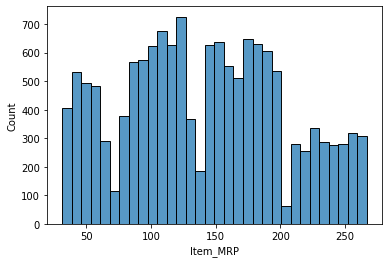

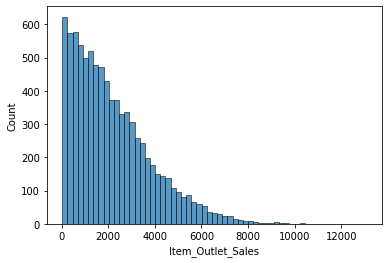

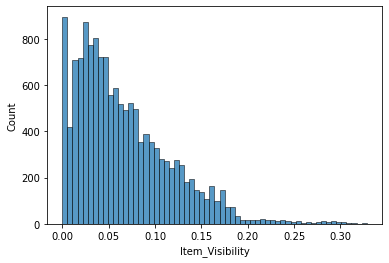

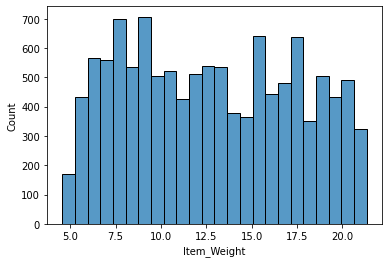

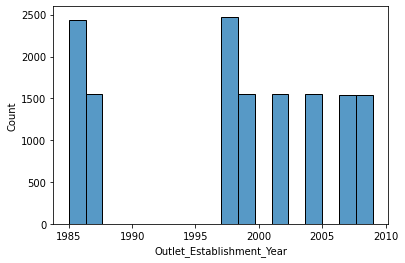

In [11]:
for i in data.describe().columns :
    sns.histplot(data[i].dropna())
    plt.show()

In [12]:
profit = pd.DataFrame({'Item_Type' : data.Item_Type, 'profit' :data.Item_Outlet_Sales})
profit.head()

,Item_Type,profit
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [13]:
state_data = profit.groupby(['Item_Type'], as_index=False).sum()
state_data

,Item_Type,profit
0,Baking Goods,1.265525e+06
1,Breads,5.532372e+05
2,Breakfast,2.322990e+05
3,Canned,1.444151e+06
4,Dairy,1.522594e+06
5,Frozen Foods,1.825735e+06
6,Fruits and Vegetables,2.820060e+06
7,Hard Drinks,4.577934e+05
8,Health and Hygiene,1.045200e+06
9,Household,2.055494e+06


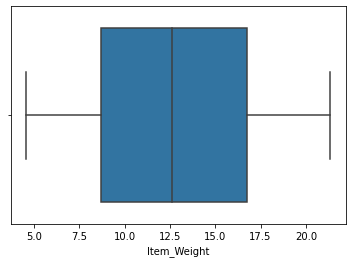

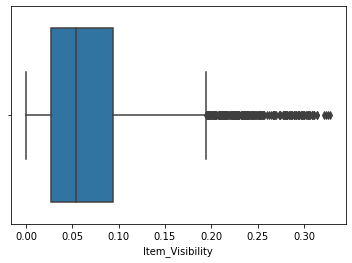

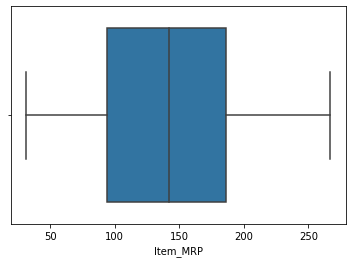

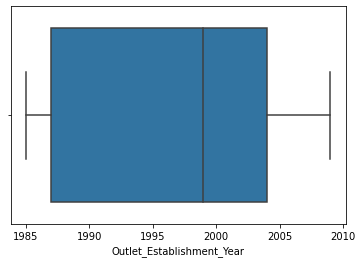

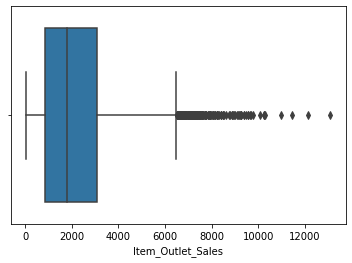

In [14]:
for i in train.describe().columns :
    sns.boxplot(data[i].dropna())
    plt.show()

### Categorical variable

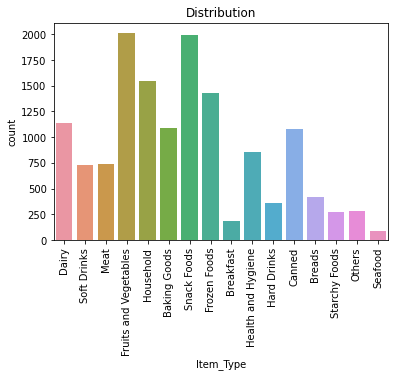

In [15]:
sns.countplot(x='Item_Type', data=data)
plt.xticks(rotation = 90)
plt.title('Distribution')
plt.show()

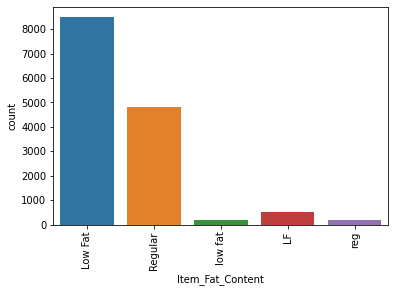

In [16]:
sns.countplot(x='Item_Fat_Content', data= data)
plt.xticks(rotation=90)
plt.show()

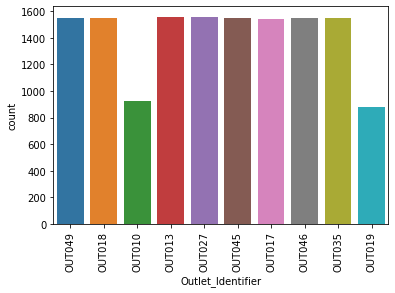

In [17]:
sns.countplot(x='Outlet_Identifier', data = data)
plt.xticks(rotation=90)
plt.show()

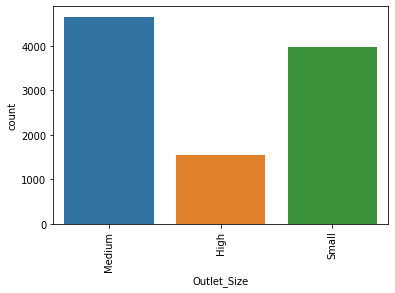

In [18]:
sns.countplot(x='Outlet_Size', data= data)
plt.xticks(rotation=90)
plt.show()

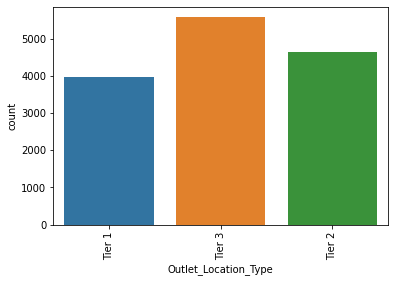

In [19]:
sns.countplot(x='Outlet_Location_Type', data=data)
plt.xticks(rotation=90)
plt.show()

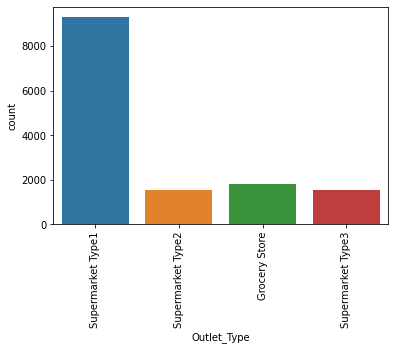

In [20]:
sns.countplot(x='Outlet_Type', data=data)
plt.xticks(rotation=90)
plt.show()

# 7).Bivariate Analysis


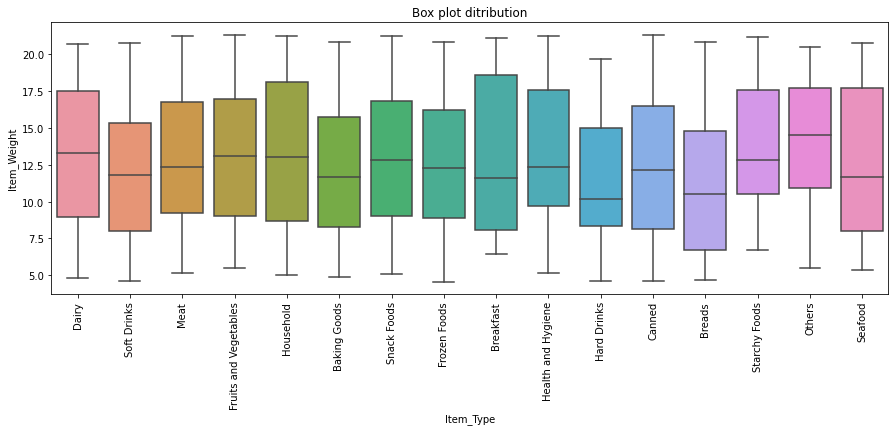

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Item_Type', y='Item_Weight', data=data)
plt.xticks(rotation=90)
plt.title('Box plot ditribution')
plt.show()

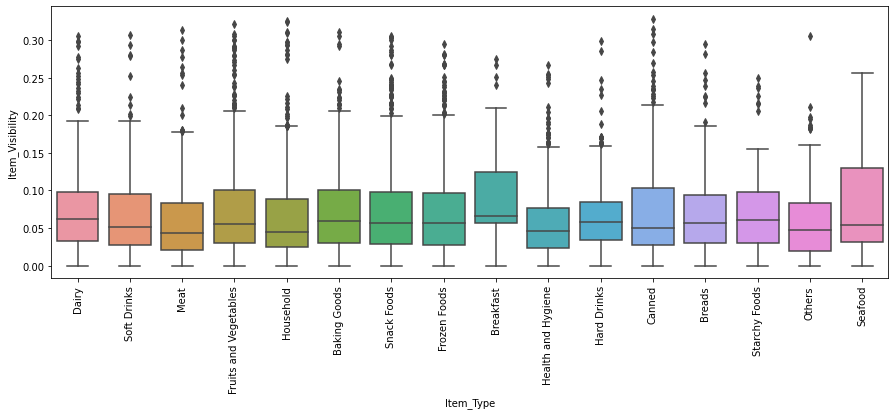

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Item_Type', y='Item_Visibility', data = data)
plt.xticks(rotation=90)
plt.show()

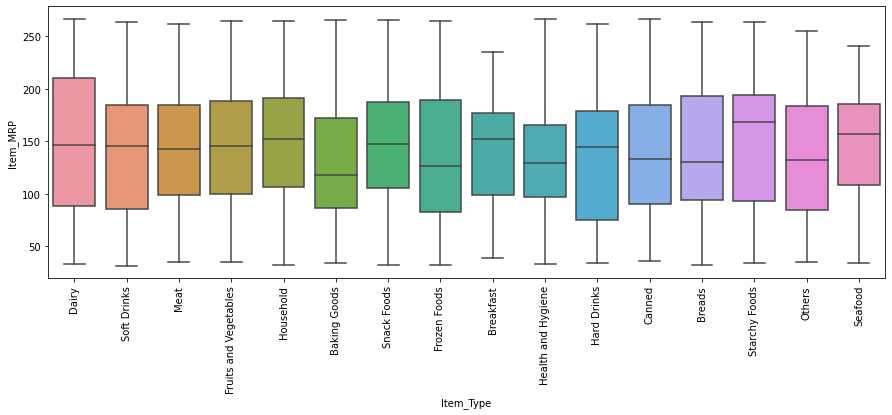

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Item_Type', y='Item_MRP', data=data)
plt.xticks(rotation=90)
plt.show()

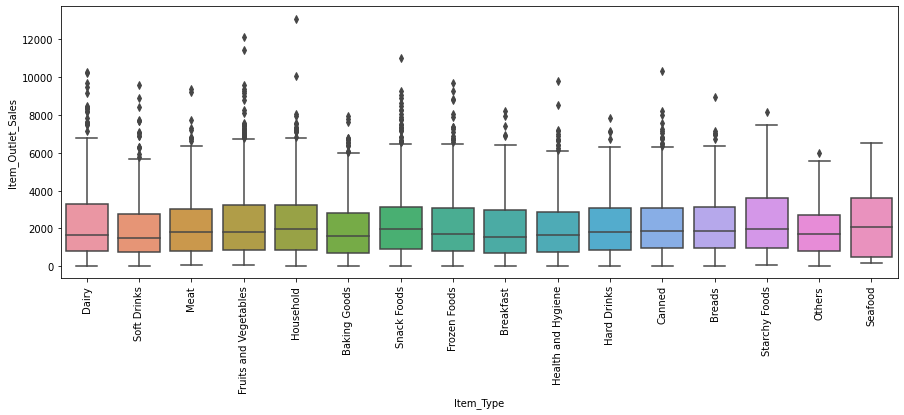

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data= data)
plt.xticks(rotation=90)
plt.show()

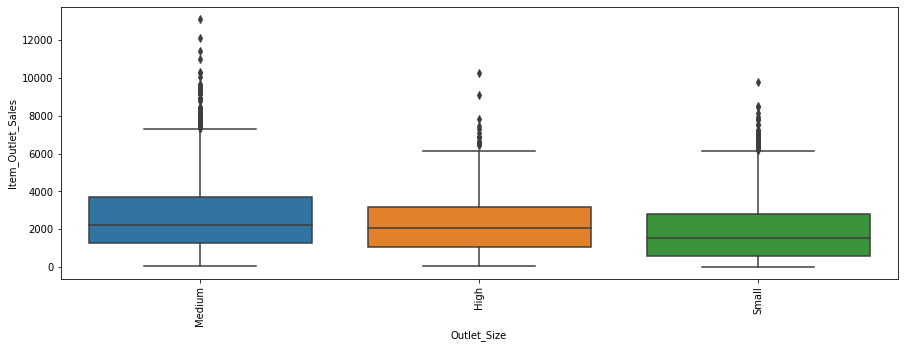

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data= data)
plt.xticks(rotation=90)
plt.show()

### Correlation Matrix

In [26]:
data.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


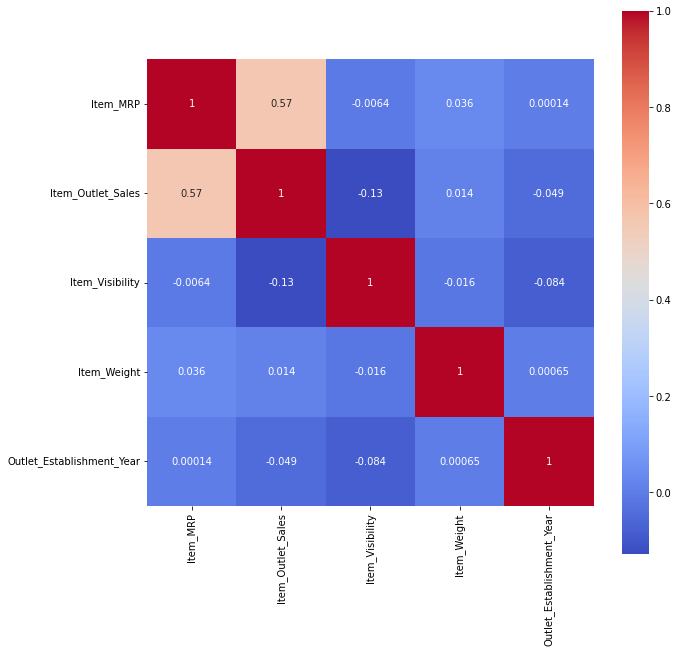

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmax=1, square=True, annot=True, cmap='coolwarm')
plt.show()

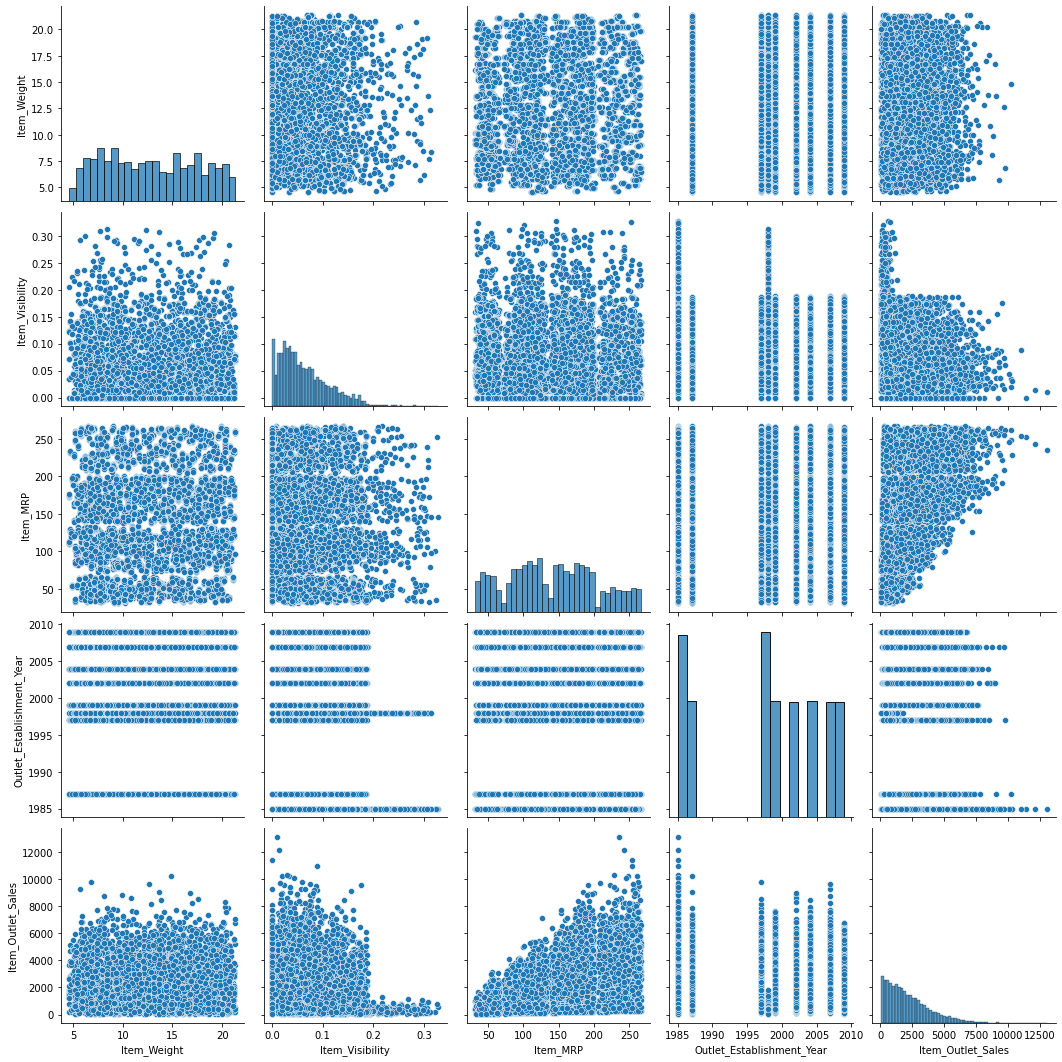

In [28]:
c_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
sns.pairplot(data[c_features], size=3.0)
plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [30]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


notice that :
- Item_Visibility has min = 0.0, it means that no one has seen the product.
- we have establishment year if we can convert it to age of the outlet will be better
- Item_Outlet_Sales and Item_weight count are low that means there is missing values in them.

In [31]:
data.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

# 8).Missing Value Treatment


In [32]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

### Filling the missing values

#### Item_Weight treatment 

In [33]:
data.Item_Weight.mean()

12.792854228644284

In [34]:
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)
# notice that we can use inplace = True or store it in data_Item_Weight

#### Item_Outlet_Sales treatment

In [35]:
data.Item_Outlet_Sales.mean()

2181.288913575032

In [36]:
data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean(), inplace=True)

#### Outlet_Size treatment

In [37]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [38]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [39]:
data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
dtype: int64

# 9).Feature Engineering


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Item_Outlet_Sales,14204.0,2181.288914,1321.864430,33.290,1468.089000,2181.288914,2181.288914,13086.964800
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_Weight,14204.0,12.792854,4.234226,4.555,9.300000,12.792854,16.000000,21.350000
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [41]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [42]:
data.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
14199,Regular,FDB58,141.3154,2181.288914,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,2181.288914,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,2181.288914,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,Medium,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,2181.288914,Canned,0.000000,15.3,2007,OUT017,Tier 2,Medium,Supermarket Type1,test
14203,Regular,FDU37,79.7960,2181.288914,Canned,0.104720,9.5,2002,OUT045,Tier 2,Medium,Supermarket Type1,test


#### Item_Type_Combined feature

In [43]:
data.Item_Identifier.value_counts()
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x: x[0:2])
data.Item_Type_Combined = data.Item_Type_Combined.map({'FD' : 'Food', 'NC' : 'Non-Consumable', 'DR' : 'Drinks'})
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### Item_Fat_Content feature

In [44]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [45]:
data.Item_Fat_Content = data.Item_Fat_Content.replace({'low fat' : 'Low Fat', 'reg' : 'Regular', 'LF' : 'Low Fat'})

In [46]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

#### Outlet_age feature

In [47]:
data['Outlet_age'] = 2022 - data.Outlet_Establishment_Year

In [48]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_age
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681,24.169319
std,62.086938,1321.864430,0.051459,4.234226,8.371664,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000,13.000000
25%,94.012000,1468.089000,0.027036,9.300000,1987.000000,18.000000
50%,142.247000,2181.288914,0.054021,12.792854,1999.000000,23.000000
75%,185.855600,2181.288914,0.094037,16.000000,2004.000000,35.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,37.000000


#### Item_Visibility_Mean feature

In [49]:
# mean of Item_Visibility is zero 
Mean_Visibility = data.Item_Visibility.mean()
data['Item_Visibility_Mean'] = data.Item_Visibility / Mean_Visibility

In [50]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_age,Item_Visibility_Mean
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681,24.169319,1.000000
std,62.086938,1321.864430,0.051459,4.234226,8.371664,8.371664,0.780234
min,31.290000,33.290000,0.000000,4.555000,1985.000000,13.000000,0.000000
25%,94.012000,1468.089000,0.027036,9.300000,1987.000000,18.000000,0.409925
50%,142.247000,2181.288914,0.054021,12.792854,1999.000000,23.000000,0.819079
75%,185.855600,2181.288914,0.094037,16.000000,2004.000000,35.000000,1.425827
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,37.000000,4.979183


# 10).Encoding Categorical Variables


#  11).Label Encoding


In [51]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_age,Item_Visibility_Mean
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,23,0.243315
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,13,0.292303
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,23,0.254122
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food,24,0.000000
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,35,0.000000


In [52]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

In [53]:
for i in var :
    data[i] = lb.fit_transform(data[i])

In [54]:
data['Outlet'] = lb.fit_transform(data.Outlet_Identifier)
data['Item_ID'] = lb.fit_transform(data.Item_Identifier)

In [55]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_age,Item_Visibility_Mean,Outlet,Item_ID
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,0,1,1,train,Food,23,0.243315,9,156
1,1,DRC01,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,2,1,2,train,Drinks,13,0.292303,3,8
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,0,1,1,train,Food,23,0.254122,9,662
3,1,FDX07,182.0950,732.3800,6,0.000000,19.20,1998,OUT010,2,1,0,train,Food,24,0.000000,0,1121
4,0,NCD19,53.8614,994.7052,9,0.000000,8.93,1987,OUT013,2,0,1,train,Non-Consumable,35,0.000000,1,1297


# 12).One Hot Encoding

In [56]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [57]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_age,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,train,23,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,train,13,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,train,23,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,6,0.000000,19.20,1998,OUT010,train,24,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,9,0.000000,8.93,1987,OUT013,train,35,...,0,1,0,0,0,0,0,0,0,0


In [58]:
data.dtypes

Item_Identifier                       object
Item_MRP                             float64
Item_Outlet_Sales                    float64
Item_Type                              int32
Item_Visibility                      float64
Item_Weight                          float64
Outlet_Establishment_Year              int64
Outlet_Identifier                     object
source                                object
Outlet_age                             int64
Item_Visibility_Mean                 float64
Item_ID                                int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_0                          uint8
Outlet_Type_1                          uint8
Outlet_Typ

In [59]:
data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Identifier'], axis=1, inplace=True)

In [60]:
data.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,source,Outlet_age,Item_Visibility_Mean,Item_ID,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,train,23,0.243315,156,1,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,train,13,0.292303,8,0,1,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,train,23,0.254122,662,1,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.000000,19.20,train,24,0.000000,1121,0,1,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.000000,8.93,train,35,0.000000,1297,1,0,...,0,1,0,0,0,0,0,0,0,0


# 13).PreProcessing Data


In [61]:
train = data.loc[data.source=="train"]
test = data.loc[data.source=='test']

train.drop(['source'], axis=1, inplace=True)
test.drop(['Item_Outlet_Sales','source'], axis=1, inplace=True)

train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)

In [62]:
train2 = pd.read_csv('train_modified.csv')
test2 = pd.read_csv('test_modified.csv')

In [63]:
print(f'Shape of train_modified is : {train2.shape}')
print(f'Shape of train_modified is : {test2.shape}')

Shape of train_modified is : (8523, 32)
Shape of train_modified is : (5681, 31)


In [64]:
train2.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_age,Item_Visibility_Mean,Item_ID,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,23,0.243315,156,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,13,0.292303,8,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,23,0.254122,662,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.000000,19.20,24,0.000000,1121,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.000000,8.93,35,0.000000,1297,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# 14).Modeling


In [65]:
y_train = train2.Item_Outlet_Sales
y_train = np.array(y_train).reshape(8523,1)
y_train.shape

(8523, 1)

In [66]:
x = train2.drop(['Item_Outlet_Sales'], axis=1, inplace=True)
x_train = train2
x_train.shape

(8523, 31)

In [67]:
test2.shape

(5681, 31)

### Linear Regression model

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(test2)
y_pred

array([[1865.74765977],
       [1588.83208256],
       [1874.62142214],
       ...,
       [1809.29511168],
       [3553.1535512 ],
       [1275.39772657]])

In [69]:
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error

In [70]:
lr_accuracy = round(model.score(x_train,y_train) * 100,2)
r2_sc = r2_score(y_train, model.predict(x_train))
print(f'Linear regression model accuracy : {lr_accuracy}')
print(f'r2 score of linear regression model : {r2_sc}')

Linear regression model accuracy : 56.36
r2 score of linear regression model : 0.5635678704211162


In [71]:
MSE = metrics.mean_squared_error(y_train, model.predict(x_train))
RMSE = np.sqrt(MSE)
print(f'Mean square error of linear model : {MSE}')
print(f'Root mean square error of linear model : {RMSE}')

Mean square error of linear model : 1270802.7511755493
Root mean square error of linear model : 1127.2988739351908


### Regularized Linear Regression (Ridge)

In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
Rmodel = Ridge(alpha=0.01, normalize=True)
Rmodel.fit(x_train,y_train)
prediction = Rmodel.predict(test2)
prediction

array([[1870.05735132],
       [1595.76908277],
       [1867.91585475],
       ...,
       [1813.81199683],
       [3542.77783894],
       [1284.61863867]])

In [73]:
Rlr_accuracy = round(Rmodel.score(x_train,y_train) * 100,2)
Rr2_sc = r2_score(y_train, Rmodel.predict(x_train))
print(f'Ridge model accuracy : {Rlr_accuracy}')
print(f'r2 score of Ridge model : {Rr2_sc}')

Ridge model accuracy : 56.35
r2 score of Ridge model : 0.5635311225431916


In [74]:
R_MSE = metrics.mean_squared_error(y_train, Rmodel.predict(x_train))
R_RMSE = np.sqrt(R_MSE)
print(f'Mean square error of Ridge model : {R_MSE}')
print(f'Root mean square error of Ridge model : {R_RMSE}')

Mean square error of Ridge model : 1270909.7536192317
Root mean square error of Ridge model : 1127.3463325967011


### Regularized Linear Regression (Lasso)

In [75]:
Lmodel = Lasso(alpha=0.01, normalize=True)
Lmodel.fit(x_train, y_train)
prediction = Lmodel.predict(test2)
prediction

array([1860.6517159 , 1580.72116293, 1878.51691015, ..., 1813.68710606,
       3549.69777983, 1274.99490618])

In [76]:
Llr_accuracy = round(Lmodel.score(x_train,y_train) * 100,2)
Lr2_sc = r2_score(y_train, Lmodel.predict(x_train))
print(f'Lasso model accuracy : {Llr_accuracy}')
print(f'r2 score of Lasso model : {Lr2_sc}')

Lasso model accuracy : 56.36
r2 score of Lasso model : 0.5635611992570659


In [77]:
L_MSE = metrics.mean_squared_error(y_train, Lmodel.predict(x_train))
L_RMSE = np.sqrt(L_MSE)
print(f'Mean square error of Lasso model : {L_MSE}')
print(f'Root mean square error of Lasso model : {L_RMSE}')

Mean square error of Lasso model : 1270822.1762660826
Root mean square error of Lasso model : 1127.3074896700025


# 17).RandomForest

In [78]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators = 600, max_depth = 6, min_samples_leaf = 120, n_jobs = 5)
RFmodel.fit(x_train, y_train)
prediction = RFmodel.predict(test2)
prediction

array([1649.88468246, 1366.29899888,  556.96793024, ..., 1927.57044671,
       3674.95006481, 1286.71582798])

In [79]:
RFr_accuracy = round(RFmodel.score(x_train,y_train) * 100,2)
RFr2_sc = r2_score(y_train, RFmodel.predict(x_train))
print(f'RandomForest model accuracy : {RFr_accuracy}')
print(f'r2 score of RandomForest model : {RFr2_sc}')

RandomForest model accuracy : 60.58
r2 score of RandomForest model : 0.6058214638550852


In [80]:
RF_MSE = metrics.mean_squared_error(y_train, RFmodel.predict(x_train))
RF_RMSE = np.sqrt(RF_MSE)
print(f'Mean square error of Lasso model : {RF_MSE}')
print(f'Root mean square error of Lasso model : {RF_RMSE}')

Mean square error of Lasso model : 1147768.7691569645
Root mean square error of Lasso model : 1071.339707635708


# 18).XGBoost

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
XGmodel = GradientBoostingRegressor(max_depth = 2)
XGmodel.fit(x_train, y_train)
prediction = XGmodel.predict(test2)
prediction

array([1684.60280169, 1405.42646284,  723.0807039 , ..., 1839.1744854 ,
       3576.08985296, 1244.46321599])

In [82]:
XG_accuracy = round(XGmodel.score(x_train,y_train) * 100,2)
XGr2_sc = r2_score(y_train, XGmodel.predict(x_train))
print(f'XGBoost model accuracy : {XG_accuracy}')
print(f'r2 score of XGBoost model : {XGr2_sc}')

XGBoost model accuracy : 61.45
r2 score of XGBoost model : 0.6145374560522093


In [83]:
XG_MSE = metrics.mean_squared_error(y_train, XGmodel.predict(x_train))
XG_RMSE = np.sqrt(XG_MSE)
print(f'Mean square error of Lasso model : {XG_MSE}')
print(f'Root mean square error of Lasso model : {XG_RMSE}')

Mean square error of Lasso model : 1122389.5495426403
Root mean square error of Lasso model : 1059.428878944991


# 19).Summary

### Linear Regression

- RMSE = 1127.2988739351908
- Accuracy = 56.36

### Ridge Regression

- RMSE = 1127.3463325967011
- Accuracy = 56.35

### Lasso Regression

- RMSE = 1127.3074896700025
- Accuracy = 56.36

### Random Forest Regression

- RMSE = 1071.2839264201962
- Accuracy = 60.59

### XGBoost 

- RMSE = 1059.428878944991
- Accuracy = 61.45

#  20).Conclusion

- Model with the lowest MSE and RMSE performs better with better accuracy.
- This mini project will help in the future to determine the number of sales that outlets are going to make and it will help to increase the profit.